In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['BBAS3.SA','BBDC4.SA']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [3]:
pf_data.tail()

,BBAS3.SA,BBDC4.SA
Date,,
2020-03-24,25.920000,20.330000
2020-03-25,29.030001,21.850000
2020-03-26,30.490000,22.309999
2020-03-27,28.639999,21.100000
2020-03-30,28.990000,21.510000


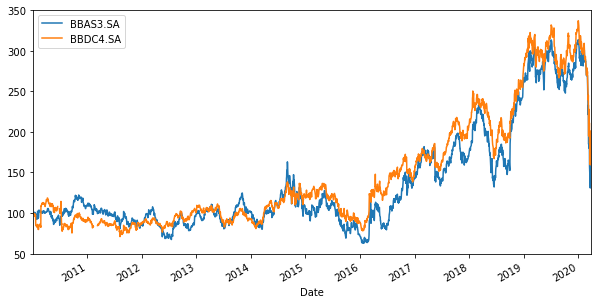

In [4]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [5]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [6]:
log_returns.mean() * 250

BBAS3.SA    0.053381
BBDC4.SA    0.067412
dtype: float64

In [7]:
log_returns.cov() * 250

,BBAS3.SA,BBDC4.SA
BBAS3.SA,0.174043,0.105353
BBDC4.SA,0.105353,0.131358


In [8]:
log_returns.corr()

,BBAS3.SA,BBDC4.SA
BBAS3.SA,1.000000,0.695703
BBDC4.SA,0.695703,1.000000


In [9]:
num_assets = len(assets)

In [10]:
num_assets

2

In [11]:
arr = np.random.random(2)
arr

array([0.00303653, 0.67718781])

In [15]:
arr[0] + arr[1]

0.6802243402507517

In [18]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.81822271, 0.18177729])

In [19]:
weights[0] + weights[1]

1.0

 Expected Portfolio Returns:


In [21]:
np.sum(weights * log_returns.mean()) * 250

0.05593196195312116

Expected Portfolio Variance:

In [23]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.15219961018789152

Expected Portfolio Variance

In [30]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.39012768446739526

In [33]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.06453328, 0.06348199, 0.05998249, 0.06122658, 0.06465251,
        0.06044481, 0.05537097, 0.06181789, 0.05492595, 0.06064019,
        0.05753784, 0.06119378, 0.06050011, 0.06091   , 0.06150375,
        0.05876678, 0.06489838, 0.06197731, 0.05943684, 0.05413084,
        0.05469647, 0.06395503, 0.06620442, 0.05470211, 0.06575016,
        0.06042154, 0.06355331, 0.06533143, 0.06091739, 0.06244484,
        0.05517766, 0.05732848, 0.06606205, 0.0673629 , 0.05419417,
        0.06142116, 0.06345984, 0.0607643 , 0.05926215, 0.06426113,
        0.05875989, 0.06601972, 0.05738946, 0.05751419, 0.06219023,
        0.06369487, 0.05666445, 0.05822578, 0.05914016, 0.06011689,
        0.05861444, 0.05446226, 0.0563768 , 0.06343664, 0.05547104,
        0.06409476, 0.06093599, 0.06266357, 0.06041297, 0.05857254,
        0.05358023, 0.06222076, 0.06005109, 0.06630538, 0.06151094,
        0.06199765, 0.05909209, 0.05832745, 0.06126202, 0.0648825 ,
        0.06392903, 0.06580714, 0.06033163, 0.05

In [34]:
portfolios = pd.DataFrame({'Returns': pfolio_returns, 'Volatility': pfolio_volatilities})

In [35]:
portfolios.head()

,Returns,Volatility
0,0.064533,0.353091
1,0.063482,0.352448
2,0.059982,0.361068
3,0.061227,0.356138
4,0.064653,0.353259


Text(0, 0.5, 'Expected Return')

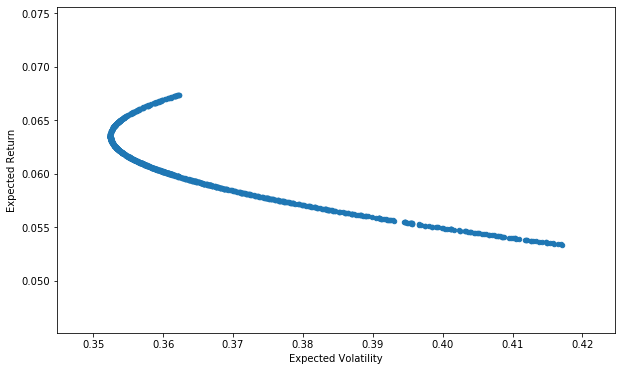

In [36]:
portfolios.plot(x='Volatility', y='Returns', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')